# Dzhanibekov effect simulation
This is a notebook to simulate the Dzhanibekov effect in real and phase space. 

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Do something to beautify the plots

%matplotlib inline

# Set formats
DARK=False
if(DARK==False):
    form='.k'
    plt.style.use(['default']) 
    fontcolor='k'
else:
    form='.w'
    plt.style.use(['dark_background'])
    fontcolor='w'


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

params = {
    'font.family': 'serif',
    'font.size' : 16, 'axes.titlesize' : 16, 'axes.labelsize' : 16, 'axes.linewidth' : 1,
    # ticks
    'xtick.labelsize' : 16, 'ytick.labelsize' : 16, 'xtick.major.size' : 8, 'xtick.minor.size' : 4,
    'ytick.major.size' : 8, 'ytick.minor.size' : 4, 'xtick.major.width' : 1, 'xtick.minor.width' : 1,
    'ytick.major.width' : 1, 'ytick.minor.width' : 1, 'xtick.direction' : 'in', 'ytick.direction' : 'in',
    # markers
    'lines.markersize' : 4, 'lines.markeredgewidth' : 1, 'errorbar.capsize' : 5, 'lines.linewidth' : 1.5,
    #'lines.linestyle' : None, 'lines.marker' : None,
    'savefig.bbox' : 'tight', 'legend.fontsize' : 16,
    'axes.labelsize': 16, 'axes.titlesize':20, 'xtick.labelsize':16, 'ytick.labelsize':16,
    'backend': 'Agg', 'mathtext.fontset': 'dejavuserif',
    'figure.facecolor':'w',
    #pad
    'axes.labelpad':8,
    # ticks
    'xtick.major.pad': 7,   'xtick.minor.pad': 7,   
    'ytick.major.pad': 4, 'ytick.minor.pad': 4,
}
plt.rcParams.update(params)


In the first cell, we have a long code that makes our plots look nice. 

In the second part, we define the moments of inertia about three principal axes, following the convention that $I_1>I_2>I_3$. 

We also have an energy dissipation rate, which is linear, but can be adjusted to other forms such as exponential or power-law. 

We then use the Euler's method to find the rate of change of the angular velocity, in the top's frame. $\omega_1$, $\omega_2$, and $\omega_3$ are the angular velocities about the three principal axes. 

In [2]:
# Define the principal moments of inertia
I1, I2, I3 = 3.0, 2.0, 1.0  # I1 > I2 > I3

# Define the dissipation rate
alpha = 0.

def dissipation_rate(omega, alpha = alpha):
    return -alpha * np.array(omega)  # Simple linear dissipation controlled by alpha

# Function to compute d(omega)/dt (Euler's equations of motion with dissipation)
def euler_equations(t, omega, I1, I2, I3, alpha = alpha):
    omega1, omega2, omega3 = omega
    domega1 = ((I2 - I3) / I1) * omega2 * omega3 + dissipation_rate(omega1, alpha)
    domega2 = ((I3 - I1) / I2) * omega3 * omega1 + dissipation_rate(omega2, alpha)
    domega3 = ((I1 - I2) / I3) * omega1 * omega2 + dissipation_rate(omega3, alpha)
    return [domega1, domega2, domega3]

# Initial conditions (starting with a small perturbation in omega2)
omega0 = [0.0, 5.0, 0.01]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

To show Dzhanibekov effect, we need to simulate the motion CLOSE TO but not exactly on the intermediate principle axis $I_2$. 

Then, we use solve_ivp to solve the equations of motion for the system. 

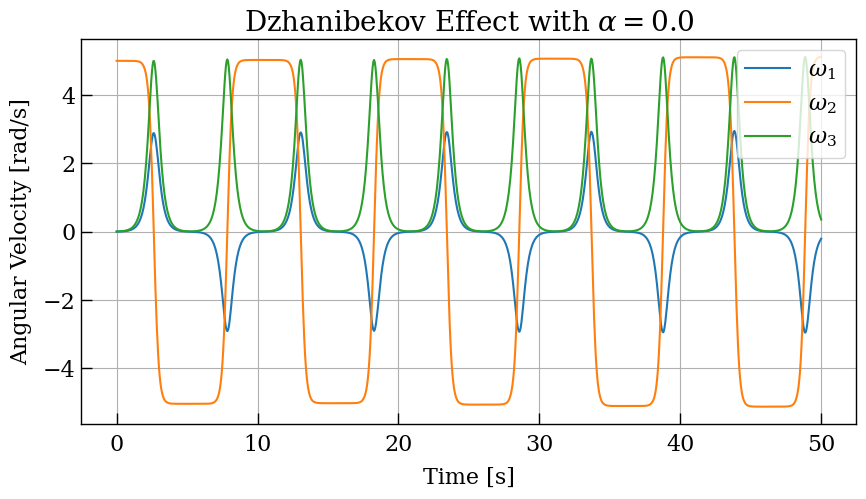

In [3]:
# Solve the differential equation
sol = solve_ivp(euler_equations, t_span, omega0, args=(I1, I2, I3), t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label=r'$\omega_1$')
plt.plot(sol.t, sol.y[1], label=r'$\omega_2$')
plt.plot(sol.t, sol.y[2], label=r'$\omega_3$')
plt.xlabel(r'Time [s]')
plt.ylabel(r'Angular Velocity [rad/s]')
plt.legend()
plt.title(f"Dzhanibekov Effect with $\\alpha={alpha}$")
plt.grid()
plt.show()

In $J$-space, the trajectory should be the intersection of two surfaces:
+ The surface corresponding to constant angular momentum $\vert\vec J\vert$, which is:
$$
J_1^2+J_2^2+J_3^2=\vert\vec J\vert^2=\text{const},
$$
this is clearly a sphere. 
+ The surfact corresponding to constant energy $E$, which is:
$$
E=\sum_i\frac{1}{2}J_i\omega_i\qquad\Rightarrow\qquad \frac{J_1^2}{2I_1E}+\frac{J_2^2}{2I_2E}+\frac{J_3^2}{2I_3E}=1,
$$
this is clearly an ellipsoid. 

We shall verify this by plotting the trajectory and the two surfaces in 3D. 

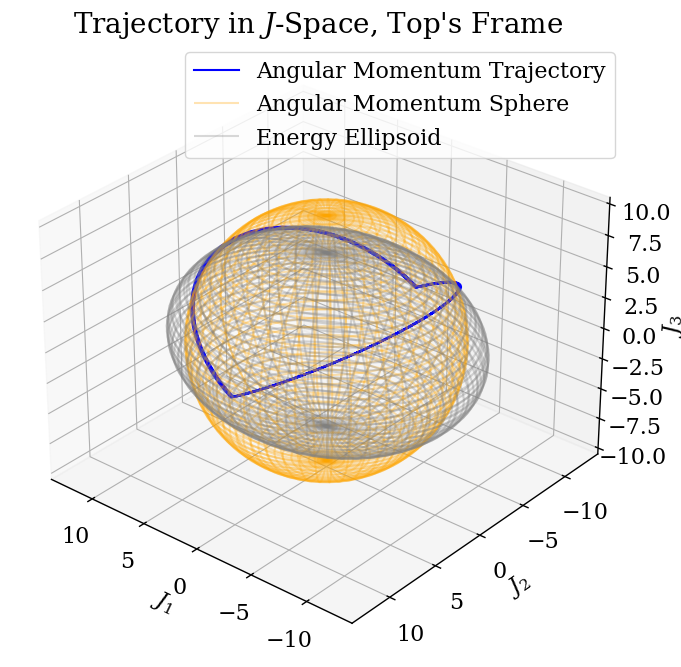

In [4]:
# Plot angular momentum trajectory (assuming alpha=0 for conservation)
J1 = I1 * sol.y[0]
J2 = I2 * sol.y[1]
J3 = I3 * sol.y[2]

# Initialize 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=130)  # Adjust these values as needed
ax.plot(J1, J2, J3, color='blue', label=f'Angular Momentum Trajectory')

# Compute constant-angular momentum sphere
J_total = np.sqrt((I1*omega0[0])**2 + (I2*omega0[1])**2 + (I3*omega0[2])**2)
phi = np.linspace(0, 2*np.pi, 50)
theta = np.linspace(0, np.pi, 50)
phi, theta = np.meshgrid(phi, theta)
x_sphere = J_total * np.sin(theta) * np.cos(phi)
y_sphere = J_total * np.sin(theta) * np.sin(phi)
z_sphere = J_total * np.cos(theta)
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color='orange', alpha=0.3, label='Angular Momentum Sphere')

# Compute constant energy ellipsoid
E = 0.5 * (I1*omega0[0]**2 + I2*omega0[1]**2 + I3*omega0[2]**2)
E_abc = [np.sqrt(2*I1*E), np.sqrt(2*I2*E), np.sqrt(2*I3*E)]
x_ellipsoid = E_abc[0] * np.sin(theta) * np.cos(phi)
y_ellipsoid = E_abc[1] * np.sin(theta) * np.sin(phi)
z_ellipsoid = E_abc[2] * np.cos(theta)
ax.plot_wireframe(x_ellipsoid, y_ellipsoid, z_ellipsoid, color='gray', alpha=0.3, label='Energy Ellipsoid')

ax.axis('equal')
ax.set_xlabel(f'$J_1$')
ax.set_ylabel(f'$J_2$')
ax.set_zlabel(f'$J_3$')
ax.set_title(f"Trajectory in $J$-Space, Top's Frame")
ax.legend()
plt.show()